In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt
from Bio import pairwise2
import pylab

In [2]:
InfluenzaA = SeqIO.read("InfluenzaA_AAs.fasta", "fasta")
print(InfluenzaA)
InfluenzaA_seq = InfluenzaA.seq
print(InfluenzaA_seq)

ID: lcl|CR536510.1_cds_CAG38748.1_1
Name: lcl|CR536510.1_cds_CAG38748.1_1
Description: lcl|CR536510.1_cds_CAG38748.1_1 [gene=GSK3B] [db_xref=GOA:Q6FI27,HGNC:4617,InterPro:IPR000719,InterPro:IPR002290,InterPro:IPR008271,InterPro:IPR011009,InterPro:IPR017441,InterPro:IPR017442,UniProtKB/TrEMBL:Q6FI27] [protein_id=CAG38748.1] [location=1..1263] [gbkey=CDS]
Number of features: 0
Seq('MAIIYLILLFTAVRGDQICIGYHANNSTEKVDTNLERNVTVTHAKDILEKTHNG...ICI')
MAIIYLILLFTAVRGDQICIGYHANNSTEKVDTNLERNVTVTHAKDILEKTHNGKLCKLNGIPPLELGDCSIAGWLLGNPECDRLLSVPEWSYIMEKENPRDGLCYPGSFNDYEELKHLLSSVKHFEKVKILPKDRWTQHTTTGGSRACAVSGNPSFFRNMVWLTKEGSDYPVAKGSYNNTSGEQMLIIWGVHHPIDETEQRTLYQNVGTYVSVGTSTLNKRSTPEIATRPKVNGQGGRMEFSWTLLDMWDTINFESTGNLIAPEYGFKISKRGSSGIMKTEGTLENCETKCQTPLGAINTTLPFHNVHPLTIGECPKYVKSEKLVLATGLRNVPQIESRGLFGAIAGFIEGGWQGMVDGWYGYHHSNDQGSGYAADKESTQKAFDGITNKVNSVIEKMNTQFEAVGKEFGNLERRLENLNKRMEDGFLDVWTYNAELLVLMENERTLDFHDSNVKNLYDKVRMQLRDNVKELGNGCFEFYHKCDDECMNSVKNGTYDYPKYEEESKLNRNEIKGVKLSSMGVYQILAIYATVAGSLSLAIMMAGISFWMCSNG

In [3]:
ZEBOV = SeqIO.read("ZEBOV_AAs.fasta", "fasta")
print(ZEBOV)
ZEBOV_seq = ZEBOV.seq
print(ZEBOV_seq)

ID: lcl|CR536510.1_cds_CAG38748.1_1
Name: lcl|CR536510.1_cds_CAG38748.1_1
Description: lcl|CR536510.1_cds_CAG38748.1_1 [gene=GSK3B] [db_xref=GOA:Q6FI27,HGNC:4617,InterPro:IPR000719,InterPro:IPR002290,InterPro:IPR008271,InterPro:IPR011009,InterPro:IPR017441,InterPro:IPR017442,UniProtKB/TrEMBL:Q6FI27] [protein_id=CAG38748.1] [location=1..1263] [gbkey=CDS]
Number of features: 0
Seq('MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVSDVDKLVCR...FVF')
MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVSDVDKLVCRDKLSSTNQLRSVGLNLEGNGVATDVPSATKRWGFRSGVPPKVVNYEAGEWAENCYNLEIKKPDGSECLPAAPDGIRGFPRCRYVHKVSGTGPCAGDFAFHKEGAFFLYDRLASTVIYRGTTFAEGVVAFLILPQAKKDFFSSHPLREPVNATEDPSSGYYSTTIRYQATGFGTNETEYLFEVDNLTYVQLESRFTPQFLLQLNETIYTSGKRSNTTGKLIWKVNPEIDTTIGEWAFWETKKNLTRKIRSEELSFTVVSNGAKNISGQSPARTSSDPGTNTTTEDHKIMASENSSAMVQVHSQGREAAVSHLTTLATISTSPQSLTTKPGPDNSTHNTPVYKLDISEATQVEQHHRRTDNDSTASDTPSATTAAGPPKAENTNTSKSTDFLDPATTTSPQNHSETAGNNNTHHQDTGEESASSGKLGLITNTIAGVAGLITGGRRTRREAIVNAQPKCNPNLHYWTTQDEGAAIGLAWIPYFGPAAEGIYIEGLMHNQDGL

In [15]:
size1 = len(InfluenzaA)
size2 = len(ZEBOV)
size=len(InfluenzaA)+len(ZEBOV)

In [11]:
alignments_score = np.empty(shape=(size1, size2))

In [6]:
# I used the wrong approach to make the dot plot of the pairwise sequence alignment
window = 3 #set window size
seq_1 = str(InfluenzaA_seq)

seq_2 = str(ZEBOV_seq)

data = [[(seq_1[i : i + window] != seq_2[j : j + window])
        for j in range(len(seq_1) - window)]
    for i in range(len(seq_2) - window)]

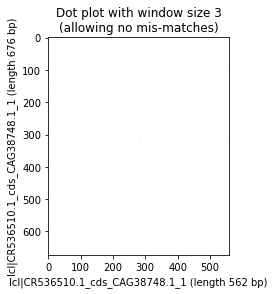

In [7]:
import pylab
pylab.gray()
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % (InfluenzaA.id, len(InfluenzaA_seq)))
pylab.ylabel("%s (length %i bp)" % (ZEBOV.id, len(ZEBOV_seq)))
pylab.title("Dot plot with window size %i\n(allowing no mis-matches)" % window)
pylab.show()

In [16]:
def pairwise_seq_heatmap(my_numpy_array, size): 
    for i in range(size): #nested for loop
        for j in range(size):
            X = InfluenzaA_seq[i] # the sequences being aligned
            Y = ZEBOV_seq[j]
            my_numpy_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))
    return my_numpy_array
My_alignment_Scores = pairwise_seq_heatmap(alignments_score, size)

IndexError: string index out of range

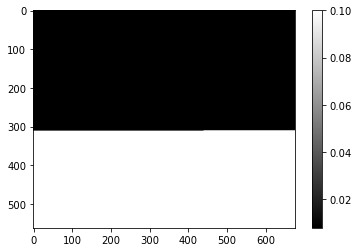

In [13]:
fig, ax = plt.subplots() #creates the subplot
plt.imshow(alignments_score) #to show the heatplot
im = ax.imshow(alignments_score) #construct heat map with axes
cbar = ax.figure.colorbar(im) #color bar on right side of the heat map
plt.show() #show plot